# Flat Mirror

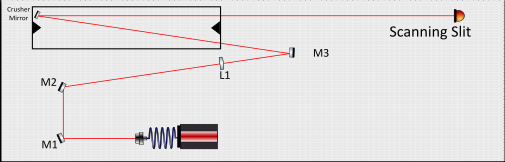

In [11]:
import matplotlib.pyplot as plt
import finesse
finesse.configure(plotting=True)

power = 55e-3  # default laser power in Watt
w0x = 444.337e-6   # gaussian waist size calculated from data taken
z0x = -.0809

w0y = 459.4e-6   # gaussian waist size calculated from data taken
z0y = -.070244

alpha = 3   # angle of incidence for both BS in degrees
xbeta = 1e-5 # default tilt of both beam splitters in radians
s1 = 12.875*2.54/100   # L1-m1
s2 = 23.25*2.54/100   # m1-m2
l1 = 21.75 *2.54/100 # m2-l1
s3 = 8.375*2.54/100  # l1-m3
s4 = 35.625*2.54/100    # m3-crusher
s5 = 121.625*2.54/100   #crusher-observation

  # default waist position


model = finesse.Model()
model.parse(f"""
    # Define laser and gaussian beam
    lambda(1550e-9)
    laser l1 P={power}
    gauss g1 l1.p1.o w0x={w0x} zx={z0x} w0y={w0y} zy={z0y}
    

    # define beamsplitters and their positions
    space s1 l1.p1 bs1.p1 L={s1}
    
    beamsplitter bs1 R=1 T=0 alpha=45 
        
    
    space s2 bs1.p2 bs2.p1 L={s2} 
    beamsplitter bs2 R=1 T=0 alpha=47
    
    lens lens1 1 
    
    space s3 bs2.p2 lens1.p1 L={l1}
    
    space s4 lens1.p2 bs3.p1 L={s3}
    
    beamsplitter bs3 R=1 T=0 alpha=10
    
    space s5 bs3.p2 crusher.p1 L={s4}
    
    beamsplitter crusher R=1 T=0 alpha=bs1.alpha 
    
    space s6 crusher.p2 n1.p1 L={s5}
    
    nothing n1 #approx location of scanning slit

    
    """
)


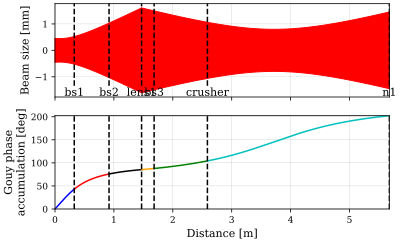

╒══════════════╤══════════╤═══════════╤══════════╤══════════╤═══════════╤═══════════════════╤═════════════════╕
│ Name         │    z [m] │   w0 [mm] │   zr [m] │   w [mm] │   RoC [m] │   Acc. Gouy [deg] │ q               │
╞══════════════╪══════════╪═══════════╪══════════╪══════════╪═══════════╪═══════════════════╪═════════════════╡
│ l1.p1.o      │ 0        │  0.444337 │ 0.400169 │ 0.453326 │  -2.06032 │            0      │ -0.081 + 0.400j │
├──────────────┼──────────┼───────────┼──────────┼──────────┼───────────┼───────────────────┼─────────────────┤
│ bs1.p1.i     │ 0.327025 │  0.444337 │ 0.400169 │ 0.521654 │   0.89675 │           43.0229 │ 0.246 + 0.400j  │
├──────────────┼──────────┼───────────┼──────────┼──────────┼───────────┼───────────────────┼─────────────────┤
│ bs1.p2.o     │ 0.327025 │  0.444337 │ 0.400169 │ 0.521654 │   0.89675 │           43.0229 │ 0.246 + 0.400j  │
├──────────────┼──────────┼───────────┼──────────┼──────────┼───────────┼───────────────────┼───────────

In [12]:
tsy = model.propagate_beam(model.l1.p1,model.n1.p1)
tsy.plot();
print(tsy)
flat_mirror_beamsize = (tsy.q("n1.p1.i").w) #beamsize at n1
waist_pos1 = (tsy.waistpos("crusher.p1.i")) 
waist_ =(tsy.w0("crusher.p1.i")) 
print(waist_pos1*-1,waist_)

# Curved Mirror

In [13]:
import matplotlib.pyplot as plt
import finesse
finesse.configure(plotting=True)

power = 55e-3  # default laser power in Watt
w0 = 452.5e-6   # gaussian waist size calculated from data taken
alpha = 3   # angle of incidence for both BS in degrees
xbeta = 1e-5 # default tilt of both beam splitters in radians
s1 = 12.875*2.54/100   # L1-m1
s2 = 23.25*2.54/100   # m1-m2
l1 = 21.75 *2.54/100 # m2-l1
s3 = 8.375*2.54/100  # l1-m3
s4 = 35.625*2.54/100    # m3-crusher
s5 = 122*2.54/100   #crusher-observation

z0 = -.075  # default waist position


model2 = finesse.Model()
model2.parse(f"""
    # Define laser and gaussian beam
    laser l1 P={power}
    gauss g1 l1.p1.o w0={w0} z={z0}
    lambda(1550e-9)

    # define beamsplitters and their positions
    space s1 l1.p1 bs1.p1 L={s1}
    beamsplitter bs1 R=1 T=0 alpha={alpha} 
    
    
    
    space s2 bs1.p2 bs2.p1 L={s2} 
    beamsplitter bs2 R=1 T=0 alpha=bs1.alpha 
    
    lens lens1 1 
    
    space s3 bs2.p2 lens1.p1 L={l1}
    
    space s4 lens1.p2 bs3.p1 L={s3}
    
    beamsplitter bs3 R=1 T=0 alpha=bs1.alpha 
    
    space s5 bs3.p2 crusher.p1 L={s4}
    
    beamsplitter crusher R=1 T=0 alpha=bs1.alpha Rc=22
    
    space s6 crusher.p2 n1.p1 L={s5}
    
    nothing n1 #approx location of scanning slit

    
    """
)

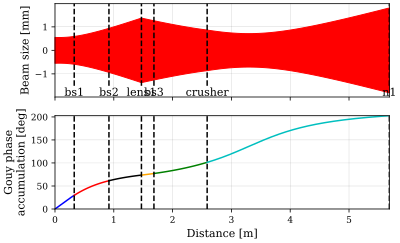

╒══════════════╤══════════╤═══════════╤══════════╤══════════╤═══════════╤═══════════════════╤═════════════════╕
│ Name         │    z [m] │   w0 [mm] │   zr [m] │   w [mm] │   RoC [m] │   Acc. Gouy [deg] │ q               │
╞══════════════╪══════════╪═══════════╪══════════╪══════════╪═══════════╪═══════════════════╪═════════════════╡
│ l1.p1.o      │ 0        │  0.546152 │ 0.604568 │ 0.550339 │  -4.94837 │            0      │ -0.075 + 0.605j │
├──────────────┼──────────┼───────────┼──────────┼──────────┼───────────┼───────────────────┼─────────────────┤
│ bs1.p1.i     │ 0.327025 │  0.546152 │ 0.604568 │ 0.591707 │   1.70229 │           29.7014 │ 0.252 + 0.605j  │
├──────────────┼──────────┼───────────┼──────────┼──────────┼───────────┼───────────────────┼─────────────────┤
│ bs1.p2.o     │ 0.327025 │  0.546152 │ 0.604568 │ 0.591707 │   1.70229 │           29.7014 │ 0.252 + 0.605j  │
├──────────────┼──────────┼───────────┼──────────┼──────────┼───────────┼───────────────────┼───────────

In [14]:
tsy2 = model2.propagate_beam(model2.l1.p1,model2.n1.p1)
tsy2.plot();
print(tsy2)
curved_mirror_beamsize = (tsy2.q("n1.p1.i").w) #beamsize at n1
waist_pos2 = (tsy2.waistpos("crusher.p1.i")) 
print(waist_pos2*-1)

In [83]:
f1 = 10000000
f_change = 1/((1/f1)-.01)
roc_change = f_change*2
print(roc_change)

-200.0020000200002


In [84]:
diff = curved_mirror_beamsize - flat_mirror_beamsize
diff2 = waist_pos2 - waist_pos1
print("Beamsize change in microns:",diff*1e6)
print(diff2)

Beamsize change in microns: 31.162676897055277
0.0


In [85]:
initial_beamsize_x = 2562
initial_beamsize_y = 2616

pushed_beamsize_x = 2579
pushed_beamsize_y = 2726

print('Measured beamsize change (x,y):', (pushed_beamsize_x-initial_beamsize_x,pushed_beamsize_y-initial_beamsize_y))
print('Total expected beamsize change')

Measured beamsize change (x,y): (17, 110)
Total expected beamsize change
